In [9]:
!pip install --upgrade pip
!pip install 'keras<3.0.0' mediapipe-model-maker

In [3]:
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe_model_maker import object_detector

2024-09-23 17:30:21.505103: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 17:30:21.505153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 17:30:21.530537: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 17:30:21.591510: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 17:30:22.640411: W tensorflow/compiler/tf2

In [26]:
pwd

'/home/kdh'

In [12]:
# !unzip golf.zip
train_dataset_path = "slice/train"
validation_dataset_path = "slice/validate"

In [13]:
import json
with open(os.path.join(train_dataset_path, "labels.json"), "r") as f:
  labels_json = json.load(f)
for category_item in labels_json["categories"]:
  print(f"{category_item['id']}: {category_item['name']}")

0: background
1: club
2: club_head
3: golf_hole
4: golf_mat
5: golfball
6: person
7: player_not_ready
8: player_ready


In [14]:
train_data = object_detector.Dataset.from_coco_folder(
    'slice/train',
    cache_dir="/tmp/od_data/train",
)

val_data = object_detector.Dataset.from_coco_folder(
    'slice/validate',
    cache_dir="/tmp/od_data/validatation")

2024-09-23 13:53:14.863930: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-23 13:53:15.013306: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-23 13:53:15.013361: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-23 13:53:15.018927: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-23 13:53:15.018989: I external/local_xla/xla/stream_executor

INFO:tensorflow:On image 0
INFO:tensorflow:On image 100
INFO:tensorflow:On image 200
INFO:tensorflow:On image 300
INFO:tensorflow:On image 400


In [15]:
hparams = object_detector.HParams(batch_size=8, learning_rate=0.3, epochs=2, export_dir='exported_model')
options = object_detector.ObjectDetectorOptions(
    supported_model=object_detector.SupportedModels.MOBILENET_V2,
    hparams=hparams
)
model = object_detector.ObjectDetector.create(
    train_data=train_data,
    validation_data=val_data,
    options=options)

2024-09-23 13:53:32.628866: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


2024-09-23 13:53:39.823346: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-09-23 13:53:39.998838: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Model: "retina_net_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobile_net (MobileNet)      {'2': (None, 64, 64, 24   2257984   
                             ),                                  
                              '3': (None, 32, 32, 32             
                             ),                                  
                              '4': (None, 16, 16, 96             
                             ),                                  
                              '5': (None, 8, 8, 320)             
                             , '6': (None, 8, 8, 128             
                             0)}                                 
                                                                 
 fpn (FPN)                   {'5': (None, 8, 8, 128)   149056    
                             , '4': (None, 16, 16, 1             
                             28),                 

INFO:tensorflow:Training the models...


Epoch 1/2


/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


2024-09-23 13:54:03.475242: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7464005940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-23 13:54:03.475287: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
I0000 00:00:1727067243.570303  154293 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


102/102 [==============================] - 72s 371ms/step - total_loss: 2.2083 - cls_loss: 1.7662 - box_loss: 0.0077 - model_loss: 2.1533 - val_total_loss: 1.1662 - val_cls_loss: 0.7713 - val_box_loss: 0.0068 - val_model_loss: 1.1111
Epoch 2/2
102/102 [==============================] - 31s 307ms/step - total_loss: 1.0784 - cls_loss: 0.7088 - box_loss: 0.0063 - model_loss: 1.0233 - val_total_loss: 0.9547 - val_cls_loss: 0.6095 - val_box_loss: 0.0058 - val_model_loss: 0.8995


In [16]:
model.export_model('slice.tflite')

Exporting a floating point model


/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


INFO:tensorflow:Assets written to: /tmp/tmp08oyuk0w/saved_model/assets


INFO:tensorflow:Assets written to: /tmp/tmp08oyuk0w/saved_model/assets
2024-09-23 13:56:00.898411: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-09-23 13:56:00.898454: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-09-23 13:56:00.898974: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp08oyuk0w/saved_model
2024-09-23 13:56:00.956472: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-09-23 13:56:00.956530: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp08oyuk0w/saved_model
2024-09-23 13:56:01.081669: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-09-23 13:56:01.130063: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-09-23 13:56:01.734781: I tensorflow/cc/saved_model/

INFO:tensorflow:TensorFlow Lite model exported successfully to: exported_model/slice.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully to: exported_model/slice.tflite


In [4]:
#@markdown We implemented some functions to visualize the object detection results. <br/> Run the following cell to activate the functions.
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [18]:
# IMAGE_FILE = 'dogs copy/train/images/001.jpeg'
IMAGE_FILE = 'golf_tst.jpg'

import cv2

detection_result DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=36, origin_y=15, width=550, height=320), categories=[Category(index=None, score=0.49494361877441406, display_name=None, category_name='club')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=504, origin_y=0, width=383, height=549), categories=[Category(index=None, score=0.4641866981983185, display_name=None, category_name='golf_mat')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=431, origin_y=311, width=425, height=368), categories=[Category(index=None, score=0.22327955067157745, display_name=None, category_name='club')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=637, origin_y=128, width=178, height=549), categories=[Category(index=None, score=0.22033224999904633, display_name=None, category_name='club')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=476, origin_y=0, width=221, height=549), categories=[Category(index=None, score=0.1129859462

I0000 00:00:1727068729.219910  114132 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c


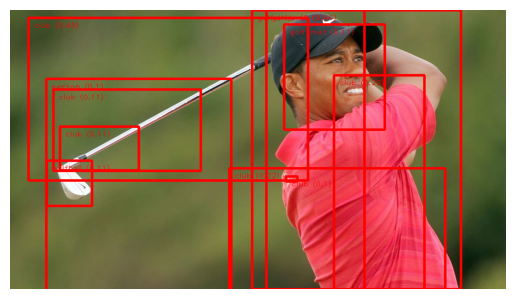

In [24]:
# STEP 1: Import the necessary modules.
from matplotlib import pyplot as plt
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

%matplotlib inline

# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='slice.tflite')#'efficientdet.tflite') #'slice_model.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.1)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)
print("detection_result",detection_result)
# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
# rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
# rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
# plt.imshow(rgb_annotated_image)
plt.imshow(annotated_image)
plt.axis('off')  # Optional: Hide axis
plt.show()

In [1]:
# dogs test

In [2]:
# IMAGE_FILE = 'dogs copy/train/images/001.jpeg'
IMAGE_FILE = 'dog.jpeg'

import cv2

detection_result DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=204, origin_y=69, width=467, height=467), categories=[Category(index=None, score=0.2767164707183838, display_name=None, category_name='aci')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=0, origin_y=298, width=863, height=397), categories=[Category(index=None, score=0.1252497136592865, display_name=None, category_name='aci')], keypoints=[])])


I0000 00:00:1727080297.022144    1316 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c


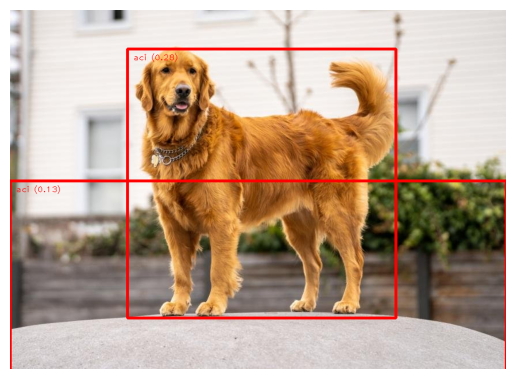

In [7]:
# STEP 1: Import the necessary modules.
from matplotlib import pyplot as plt
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

%matplotlib inline

# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='dogs.tflite')#'efficientdet.tflite') #'slice_model.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.1)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)
print("detection_result",detection_result)
# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
# rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
# rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
# plt.imshow(rgb_annotated_image)
plt.imshow(annotated_image)
plt.axis('off')  # Optional: Hide axis
plt.show()

In [ ]:
# fin dont need whats below

<Figure size 640x480 with 0 Axes>

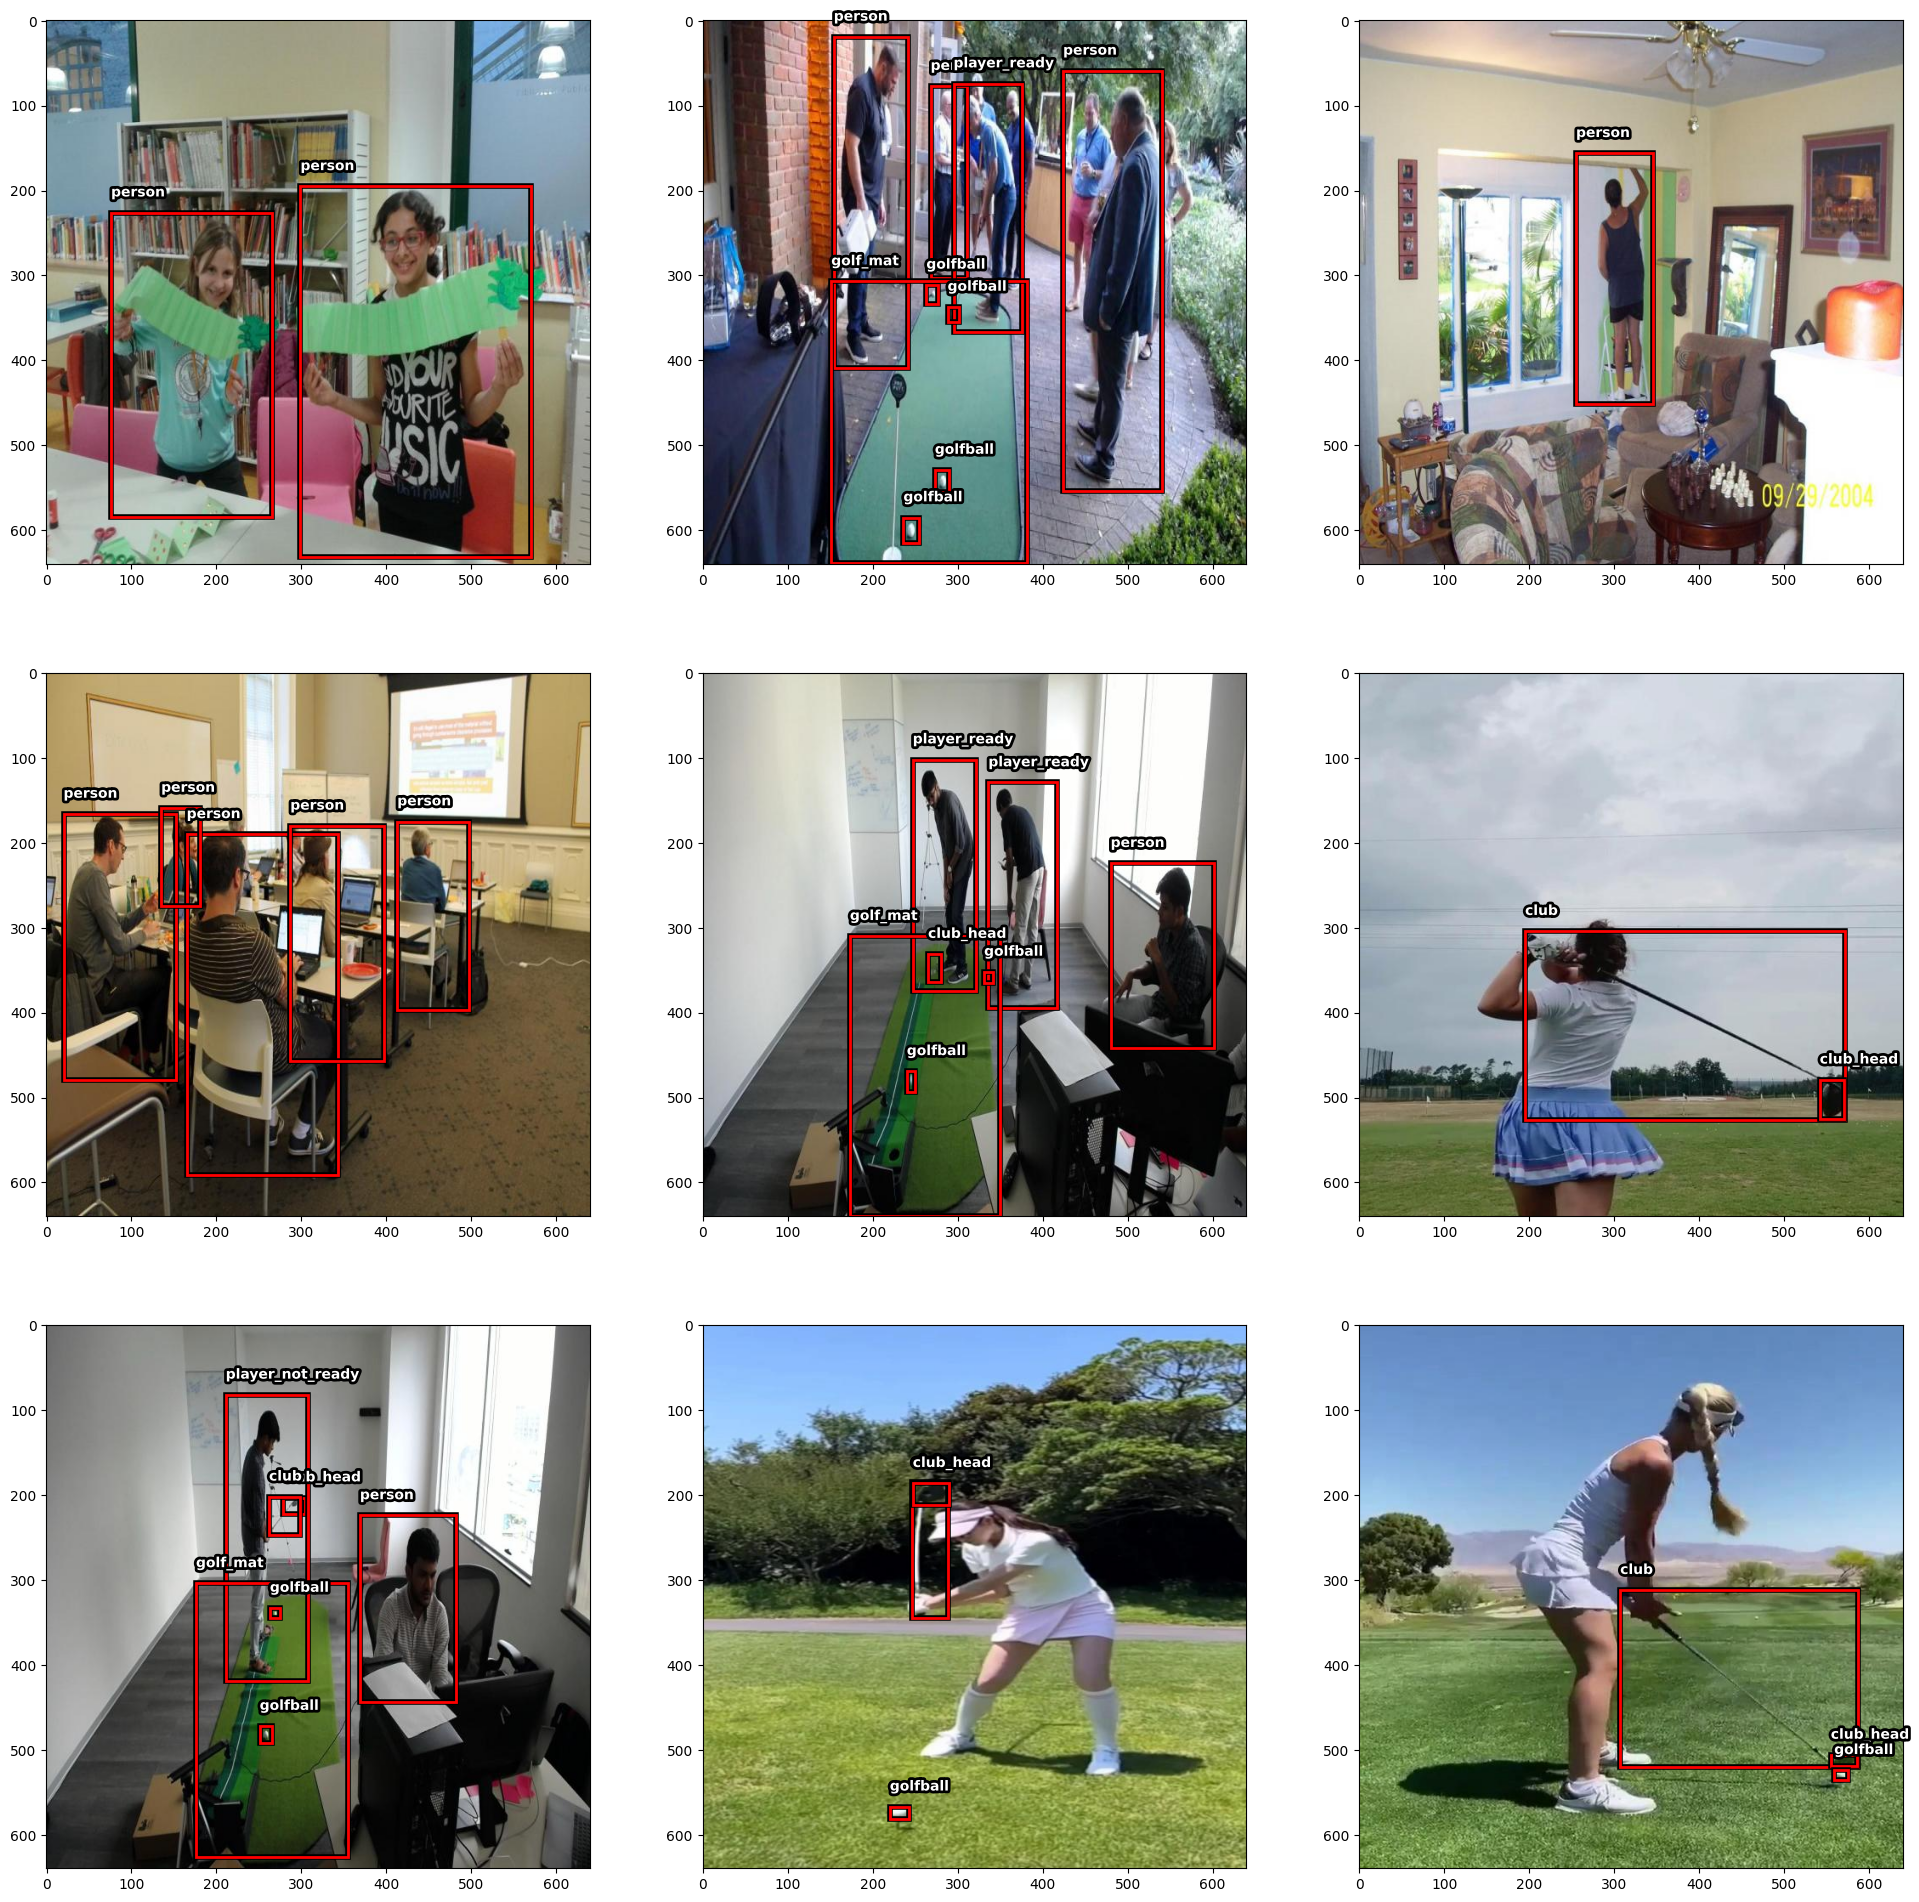

In [29]:
#@title Visualize the training dataset
import matplotlib.pyplot as plt
from matplotlib import patches, text, patheffects
from collections import defaultdict
import math

# for jupyter
%matplotlib inline

def draw_outline(obj):
  obj.set_path_effects([patheffects.Stroke(linewidth=4,  foreground='black'), patheffects.Normal()])
def draw_box(ax, bb):
  patch = ax.add_patch(patches.Rectangle((bb[0],bb[1]), bb[2], bb[3], fill=False, edgecolor='red', lw=2))
  draw_outline(patch)
def draw_text(ax, bb, txt, disp):
  text = ax.text(bb[0],(bb[1]-disp),txt,verticalalignment='top'
  ,color='white',fontsize=10,weight='bold')
  draw_outline(text)
def draw_bbox(ax, annotations_list, id_to_label, image_shape):
  for annotation in annotations_list:
    cat_id = annotation["category_id"]
    bbox = annotation["bbox"]
    draw_box(ax, bbox)
    draw_text(ax, bbox, id_to_label[cat_id], image_shape[0] * 0.05)
def visualize(dataset_folder, max_examples=None):
  with open(os.path.join(dataset_folder, "labels.json"), "r") as f:
    labels_json = json.load(f)
  images = labels_json["images"]
  cat_id_to_label = {item["id"]:item["name"] for item in labels_json["categories"]}
  image_annots = defaultdict(list)
  for annotation_obj in labels_json["annotations"]:
    image_id = annotation_obj["image_id"]
    image_annots[image_id].append(annotation_obj)

  if max_examples is None:
    max_examples = len(image_annots.items())
  n_rows = math.ceil(max_examples / 3)
  fig, axs = plt.subplots(n_rows, 3, figsize=(24, n_rows*8)) # 3 columns(2nd index), 8x8 for each image
  for ind, (image_id, annotations_list) in enumerate(list(image_annots.items())[:max_examples]):
    ax = axs[ind//3, ind%3]
    img = plt.imread(os.path.join(dataset_folder, 'images',  images[image_id]["file_name"]))
    #  img = plt.imread(os.path.join( images[image_id]["file_name"]))
    ax.imshow(img)
    draw_bbox(ax, annotations_list, cat_id_to_label, img.shape)
  plt.show()

# for headless server
plt.savefig('output_plot.png')


visualize(train_dataset_path, 9)

In [30]:
train_data = object_detector.Dataset.from_coco_folder(train_dataset_path, cache_dir="/tmp/od_data/train")
validation_data = object_detector.Dataset.from_coco_folder(validation_dataset_path, cache_dir="/tmp/od_data/validation")
print("train_data size: ", train_data.size)
print("validation_data size: ", validation_data.size)

train_data size:  820
validation_data size:  417


In [31]:
# Customize hyperparameters (HParams) for training
hparams = object_detector.HParams(
    export_dir='exported_model',  # Where to export the model
    learning_rate=0.01,           # Set a custom learning rate
    batch_size=16,                # Set a custom batch size
    epochs=5,                     # Set the number of training epochs
    cosine_decay_epochs=None,     # Control cosine decay
    cosine_decay_alpha=1.0        # Control the alpha for cosine decay
)

# Define the model spec (MobileNet)
spec = object_detector.SupportedModels.MOBILENET_MULTI_AVG

# Pass the correct hparams into the options
options = object_detector.ObjectDetectorOptions(
    supported_model=spec,
    hparams=hparams
)

# Initialize the ObjectDetector without training
print(f"options {options}")

# This will now reflect your customized options
model = object_detector.ObjectDetector.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)


options ObjectDetectorOptions(supported_model=<SupportedModels.MOBILENET_MULTI_AVG: functools.partial(<class 'mediapipe_model_maker.python.vision.object_detector.model_spec.ModelSpec'>, downloaded_files=DownloadedFiles(path='object_detector/mobilenetmultiavg', url='https://storage.googleapis.com/tf_model_garden/vision/qat/mobilenetv3.5_ssd_coco/mobilenetv3.5_ssd_i256_ckpt.tar.gz', is_folder=True), checkpoint_name='ckpt-277200', input_image_shape=[256, 256, 3], model_id='MobileNetMultiAVG', min_level=3, max_level=7)>, model_options=None, hparams=HParams(learning_rate=0.01, batch_size=16, epochs=5, steps_per_epoch=None, class_weights=None, shuffle=False, repeat=False, export_dir='exported_model', distribution_strategy='off', num_gpus=0, tpu='', _strategy=<tensorflow.python.distribute.distribute_lib._DefaultDistributionStrategy object at 0x7f73f4b7c520>, cosine_decay_epochs=None, cosine_decay_alpha=1.0))


/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


Using existing files at /tmp/model_maker/object_detector/mobilenetmultiavg
Model: "retina_net_model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobile_net_4 (MobileNet)    {'2': (None, 64, 64, 32   3704416   
                             ),                                  
                              '3': (None, 32, 32, 64             
                             ),                                  
                              '4': (None, 16, 16, 16             
                             0),                                 
                              '5': (None, 8, 8, 192)             
                             , '6': (None, 1, 1, 128             
                             0)}                                 
                                                                 
 fpn_4 (FPN)                 {'5': (None, 8, 8, 128)   144928    
                             , '4': (No

INFO:tensorflow:Training the models...


Epoch 1/5


/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


51/51 [==============================] - 46s 506ms/step - total_loss: 7.3756 - cls_loss: 6.8919 - box_loss: 0.0084 - model_loss: 7.3127 - val_total_loss: 1.6817 - val_cls_loss: 1.2428 - val_box_loss: 0.0075 - val_model_loss: 1.6188
Epoch 2/5
51/51 [==============================] - 22s 429ms/step - total_loss: 1.7027 - cls_loss: 1.2459 - box_loss: 0.0079 - model_loss: 1.6398 - val_total_loss: 1.6145 - val_cls_loss: 1.1885 - val_box_loss: 0.0073 - val_model_loss: 1.5516
Epoch 3/5
51/51 [==============================] - 22s 436ms/step - total_loss: 1.6347 - cls_loss: 1.1965 - box_loss: 0.0075 - model_loss: 1.5718 - val_total_loss: 1.5680 - val_cls_loss: 1.1499 - val_box_loss: 0.0071 - val_model_loss: 1.5051
Epoch 4/5
51/51 [==============================] - 23s 443ms/step - total_loss: 1.5689 - cls_loss: 1.1539 - box_loss: 0.0070 - model_loss: 1.5060 - val_total_loss: 1.5198 - val_cls_loss: 1.1119 - val_box_loss: 0.0069 - val_model_loss: 1.4570
Epoch 5/5
51/51 [=========================

In [13]:
loss, coco_metrics = model.evaluate(validation_data, batch_size=4)
print(f"Validation loss: {loss}")
print(f"Validation coco metrics: {coco_metrics}")

105/105 [==============================] - 6s 52ms/step - total_loss: 1.4981 - cls_loss: 1.0993 - box_loss: 0.0067 - model_loss: 1.4352
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.36s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.147
 Average Recall     (AR) @[

In [32]:
# Save the model (ensure the export directory is writable and accessible)
model.export_model('slice_model.h5')
model.export_model('slice_model.tflite')

# Load the model (use a compatible method to load)
# loaded_model = tf.saved_model.load('saved_model')

# Print model summary or inspect its structure
# Use the appropriate method to inspect the loaded model

Exporting a floating point model


/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


INFO:tensorflow:Assets written to: /tmp/tmppn_wit9u/saved_model/assets


INFO:tensorflow:Assets written to: /tmp/tmppn_wit9u/saved_model/assets
2024-09-23 13:01:02.803833: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-09-23 13:01:02.803915: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-09-23 13:01:02.804084: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmppn_wit9u/saved_model
2024-09-23 13:01:02.864561: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-09-23 13:01:02.864605: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmppn_wit9u/saved_model
2024-09-23 13:01:03.018856: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-09-23 13:01:03.609421: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmppn_wit9u/saved_model
2024-09-23 13:01:03.844929: I ten

INFO:tensorflow:TensorFlow Lite model exported successfully to: exported_model/slice_model.h5


INFO:tensorflow:TensorFlow Lite model exported successfully to: exported_model/slice_model.h5


Exporting a floating point model


/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


INFO:tensorflow:Assets written to: /tmp/tmpt700e6r5/saved_model/assets


INFO:tensorflow:Assets written to: /tmp/tmpt700e6r5/saved_model/assets
2024-09-23 13:01:36.482853: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-09-23 13:01:36.482910: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-09-23 13:01:36.483064: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpt700e6r5/saved_model
2024-09-23 13:01:36.535520: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-09-23 13:01:36.535557: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpt700e6r5/saved_model
2024-09-23 13:01:36.723727: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-09-23 13:01:37.287334: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpt700e6r5/saved_model
2024-09-23 13:01:37.549185: I ten

INFO:tensorflow:TensorFlow Lite model exported successfully to: exported_model/slice_model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully to: exported_model/slice_model.tflite


In [15]:
pwd

'/home/kdh'

In [12]:
# eval
loss, coco_metrics = model.evaluate(validation_data, batch_size=4)
print(f"Validation loss: {loss}")
print(f"Validation coco metrics: {coco_metrics}")

205/205 [==============================] - 14s 64ms/step - total_loss: 0.6913 - cls_loss: 0.3974 - box_loss: 0.0046 - model_loss: 0.6286


/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.99s).
Accumulating evaluation results...
DONE (t=0.45s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.329
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.515
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.343
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.442
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.428
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.514
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.522
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.053
 Av

In [13]:
pwd

'/home/kdh'

In [14]:
# cd ..  # exported_model

In [15]:
# ls

In [16]:
# Model quantization
# Quantization aware training (int8 quantization)
qat_hparams = object_detector.QATHParams(learning_rate=0.3, batch_size=16, epochs=10, decay_steps=6, decay_rate=0.96)
model.quantization_aware_training(train_data, validation_data, qat_hparams=qat_hparams)
qat_loss, qat_coco_metrics = model.evaluate(validation_data)
print(f"QAT validation loss: {qat_loss}")
print(f"QAT validation coco metrics: {qat_coco_metrics}")

/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


Epoch 1/10


/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


51/51 [==============================] - 98s 1s/step - total_loss: 2.3816 - cls_loss: 1.1828 - box_loss: 0.0240 - model_loss: 2.3816 - val_total_loss: 2.0690 - val_cls_loss: 1.1714 - val_box_loss: 0.0180 - val_model_loss: 2.0690
Epoch 2/10
51/51 [==============================] - 66s 1s/step - total_loss: 1.9207 - cls_loss: 1.0935 - box_loss: 0.0165 - model_loss: 1.9207 - val_total_loss: 2.0009 - val_cls_loss: 1.1478 - val_box_loss: 0.0171 - val_model_loss: 2.0009
Epoch 3/10
51/51 [==============================] - 67s 1s/step - total_loss: 1.8112 - cls_loss: 1.0463 - box_loss: 0.0153 - model_loss: 1.8112 - val_total_loss: 1.9888 - val_cls_loss: 1.1350 - val_box_loss: 0.0171 - val_model_loss: 1.9888
Epoch 4/10
51/51 [==============================] - 71s 1s/step - total_loss: 1.7737 - cls_loss: 1.0287 - box_loss: 0.0149 - model_loss: 1.7737 - val_total_loss: 1.9502 - val_cls_loss: 1.1311 - val_box_loss: 0.0164 - val_model_loss: 1.9502
Epoch 5/10
51/51 [==============================] -

In [17]:
new_qat_hparams = object_detector.QATHParams(learning_rate=0.9, batch_size=16, epochs=15, decay_steps=5, decay_rate=0.96)
model.restore_float_ckpt()
model.quantization_aware_training(train_data, validation_data, qat_hparams=new_qat_hparams)
qat_loss, qat_coco_metrics = model.evaluate(validation_data)
print(f"QAT validation loss: {qat_loss}")
print(f"QAT validation coco metrics: {qat_coco_metrics}")

Using existing files at /tmp/model_maker/object_detector/mobilenetmultiavg
Model: "retina_net_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobile_net_2 (MobileNet)    {'2': (None, 64, 64, 32   3704416   
                             ),                                  
                              '3': (None, 32, 32, 64             
                             ),                                  
                              '4': (None, 16, 16, 16             
                             0),                                 
                              '5': (None, 8, 8, 192)             
                             , '6': (None, 1, 1, 128             
                             0)}                                 
                                                                 
 fpn_2 (FPN)                 {'5': (None, 8, 8, 128)   144928    
                             , '4': (No

51/51 [==============================] - 119s 2s/step - total_loss: 2.2656 - cls_loss: 1.1751 - box_loss: 0.0218 - model_loss: 2.2656 - val_total_loss: 2.0119 - val_cls_loss: 1.1015 - val_box_loss: 0.0182 - val_model_loss: 2.0119
Epoch 2/15
51/51 [==============================] - 78s 2s/step - total_loss: 1.8917 - cls_loss: 1.0883 - box_loss: 0.0161 - model_loss: 1.8917 - val_total_loss: 1.9310 - val_cls_loss: 1.0839 - val_box_loss: 0.0169 - val_model_loss: 1.9310
Epoch 3/15
51/51 [==============================] - 65s 1s/step - total_loss: 1.8293 - cls_loss: 1.0518 - box_loss: 0.0155 - model_loss: 1.8293 - val_total_loss: 1.9123 - val_cls_loss: 1.1035 - val_box_loss: 0.0162 - val_model_loss: 1.9123
Epoch 4/15
51/51 [==============================] - 65s 1s/step - total_loss: 1.7939 - cls_loss: 1.0283 - box_loss: 0.0153 - model_loss: 1.7939 - val_total_loss: 1.9254 - val_cls_loss: 1.1151 - val_box_loss: 0.0162 - val_model_loss: 1.9254
Epoch 5/15
51/51 [==============================] 

KeyboardInterrupt: 

In [ ]:
model.export_model('model_int8_qat.tflite')
!ls -lh exported_model
files.download('exported_model/model_int8_qat.tflite')

In [22]:
pwd

'/home/kdh'

In [35]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2

IMAGE_FILE = 'golf_tst.jpg'

# STEP 1: Import the necessary modules.
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='slice_model.h5')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)

I0000 00:00:1727064224.430544     689 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c


TypeError: expected str, bytes or os.PathLike object, not ndarray

In [ ]:
model_path = '/absolute/path/to/lite-model_efficientdet_lite0_detection_metadata_1.tflite'

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np

IMAGE_FILE = 'golf_tst.jpg'

# Function to visualize detection results
def visualize_detection(image, detection_result):
    annotated_image = image.copy()
    for detection in detection_result.detections:
        bbox = detection.bounding_box
        start_point = bbox.origin_x, bbox.origin_y
        end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
        cv2.rectangle(annotated_image, start_point, end_point, (0, 255, 0), 2)
        
        category = detection.categories[0]
        category_name = category.category_name
        probability = round(category.score, 2)
        result_text = f'{category_name} ({probability})'
        text_location = (bbox.origin_x, bbox.origin_y - 10)
        cv2.putText(annotated_image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 2)
    
    return annotated_image

# STEP 1: Import the necessary modules.
# (Already done at the top of the script)

# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='slice_model.tflite')  # Note: Changed to .tflite
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result and visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize_detection(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the image
cv2.imshow('Object Detection Result', rgb_annotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optionally, save the annotated image
cv2.imwrite('annotated_golf_tst.jpg', annotated_image)

# Print detection results
print("Detection Results:")
for detection in detection_result.detections:
    category = detection.categories[0]
    print(f"Category: {category.category_name}")
    print(f"Confidence: {category.score:.2f}")
    bbox = detection.bounding_box
    print(f"Bounding Box: (x={bbox.origin_x}, y={bbox.origin_y}, width={bbox.width}, height={bbox.height})")
    print("---")

2024-09-23 13:05:40.330669: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 13:05:40.330736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 13:05:40.336774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 13:05:40.349483: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 13:05:41.289766: W tensorflow/compiler/tf2

In [1]:
#@markdown We implemented some functions to visualize the object detection results. <br/> Run the following cell to activate the functions.
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [2]:
# IMAGE_FILE = 'dogs copy/train/images/001.jpeg'
IMAGE_FILE = 'golf_tst.jpg'

import cv2
# from google.colab.patches import cv2_imshow

I0000 00:00:1727066951.575216  114132 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c


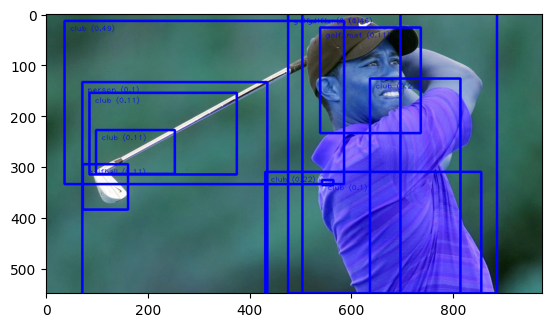

In [8]:
# STEP 1: Import the necessary modules.
from matplotlib import pyplot as plt
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='slice.tflite')#'efficientdet.tflite') #'slice_model.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.1)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_annotated_image)

In [20]:
from mediapipe_model_maker import quantization

In [21]:
quantization_config = quantization.QuantizationConfig.for_float16()

In [22]:
model.restore_float_ckpt()
model.export_model(model_name="model_fp16.tflite", quantization_config=quantization_config)
!ls -lh exported_model
files.download('exported_model/model_fp16.tflite')

/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


Using existing files at /tmp/model_maker/object_detector/mobilenetmultiavg
Model: "retina_net_model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobile_net_6 (MobileNet)    {'2': (None, 64, 64, 32   3704416   
                             ),                                  
                              '3': (None, 32, 32, 64             
                             ),                                  
                              '4': (None, 16, 16, 16             
                             0),                                 
                              '5': (None, 8, 8, 192)             
                             , '6': (None, 1, 1, 128             
                             0)}                                 
                                                                 
 fpn_6 (FPN)                 {'5': (None, 8, 8, 128)   144928    
                             , '4': (N

/home/kdh/anaconda3/envs/slice/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


INFO:tensorflow:Assets written to: /tmp/tmp3_itpypb/saved_model/assets


INFO:tensorflow:Assets written to: /tmp/tmp3_itpypb/saved_model/assets
2024-09-20 12:17:20.659670: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-09-20 12:17:20.659725: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-09-20 12:17:20.659893: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp3_itpypb/saved_model
2024-09-20 12:17:20.755120: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-09-20 12:17:20.755162: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp3_itpypb/saved_model
2024-09-20 12:17:20.911713: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-09-20 12:17:21.577113: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmp3_itpypb/saved_model
2024-09-20 12:17:21.864879: I ten

INFO:tensorflow:TensorFlow Lite model exported successfully to: exported_model/model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully to: exported_model/model_fp16.tflite


total 64M
-rw-r--r-- 1 kdh kdh  13M Sep 18 23:03 exported_model
-rw-r--r-- 1 kdh kdh  16M Sep 19 16:48 float_ckpt.data-00000-of-00001
-rw-r--r-- 1 kdh kdh  32K Sep 19 16:48 float_ckpt.index
-rw-r--r-- 1 kdh kdh 2.4M Sep 20 12:17 metadata.json
-rw-r--r-- 1 kdh kdh  13M Sep 19 12:57 model.tflite
-rw-r--r-- 1 kdh kdh 6.3M Sep 20 12:17 model_fp16.tflite
-rw-r--r-- 1 kdh kdh 3.6M Sep 20 12:16 model_int8_qat.tflite
-rw-r--r-- 1 kdh kdh  13M Sep 19 16:48 saved_model


NameError: name 'files' is not defined